In [5]:
import pandas as pd
data = pd.read_csv("C:/Users/Usuario/Documents/TFM - Chey/ADNI_Complete1YearVisitList_3T_8_28_12.csv", sep=',')

In [6]:
data

,RID,PTID,Screen.Diagnosis,Visit,Scan.Date,Sequence,Study.ID,Series.ID,Image.ID
0,15,100_S_0015,NL,Month 6,5/2/06,MPR-R; ; N3; Scaled,3695,13884,33041
1,15,100_S_0015,NL,Baseline,10/31/05,MPR-R; ; N3; Scaled,2613,8833,33046
2,15,100_S_0015,NL,Month 12,10/16/06,MPR-R; ; N3; Scaled,5490,20311,63475
3,30,023_S_0030,MCI,Baseline,10/26/05,MPR; GradWarp; B1 Correction; N3; Scaled,2591,8908,31623
4,30,023_S_0030,MCI,Month 6,4/13/06,MPR; GradWarp; B1 Correction; N3; Scaled,3512,13207,51902
...,...,...,...,...,...,...,...,...,...
416,1385,027_S_1385,AD,Month 6,9/26/07,MPR; GradWarp; B1 Correction; N3; Scaled,12318,40030,79577
417,1385,027_S_1385,AD,Month 12,3/26/08,MPR; GradWarp; B1 Correction; N3; Scaled,15166,47505,101541
418,1387,027_S_1387,MCI,Baseline,3/19/07,MPR; GradWarp; B1 Correction; N3; Scaled,7688,28276,47757
419,1387,027_S_1387,MCI,Month 6,10/26/07,MPR; GradWarp; B1 Correction; N3; Scaled,13466,41966,87565


In [7]:
nii_list = pd.read_csv("C:/Users/Usuario/Documents/TFM - Chey/adni_nii_files_list.txt", sep = ";", header=None)
nii_list.rename(columns={0:"subject", 1:"file"}, inplace = True)
nii_list

,subject,file
0,subject1,ADNI_002_S_0413_MR_MPR____N3__Scaled_2_Br_2008...
1,subject10,ADNI_012_S_1009_MR_MPR____N3__Scaled_Br_200709...
2,subject100,ADNI_100_S_0015_MR_MPR____N3__Scaled_Br_200711...
3,subject101,ADNI_100_S_0190_MR_MPR____N3__Scaled_Br_200612...
4,subject102,ADNI_100_S_0190_MR_MPR____N3__Scaled_Br_200805...
...,...,...
261,subject95,ADNI_052_S_1251_MR_MPR__GradWarp__B1_Correctio...
262,subject96,ADNI_053_S_0507_MR_MPR____N3__Scaled_2_Br_2008...
263,subject97,ADNI_053_S_0507_MR_MPR____N3__Scaled__No_phant...
264,subject98,ADNI_067_S_0607_MR_MPR__GradWarp__B1_Correctio...


In [8]:
nii_files = list(nii_list["file"])

In [9]:
data_labels = pd.DataFrame()
not_found = []

for file in nii_files:
    subject = ''
    idx = [i for i in range(len(file)) if file[i] == '_']

    PTID = file[idx[0]+1:idx[3]]
    SeriesID = int(file[idx[-2]+2:idx[-1]])
    ImageID = int(file[idx[-1]+2:-4])
    
    subject = data[["PTID", "Series.ID", "Image.ID", "Screen.Diagnosis"]][(data["PTID"] == PTID) & (data["Series.ID"] == SeriesID) & (data["Image.ID"] == ImageID)]
    if len(subject) == 0:
        not_found.append(file)
        continue
    subject["Subject.ID"] = nii_list["subject"][nii_list["file"] == file].values[0]
    subject["Nii.File"] = file
    
    data_labels = pd.concat([data_labels, subject])

In [10]:
data_labels

,PTID,Series.ID,Image.ID,Screen.Diagnosis,Subject.ID,Nii.File
130,002_S_0413,22683,128346,NL,subject1,ADNI_002_S_0413_MR_MPR____N3__Scaled_2_Br_2008...
277,012_S_1009,32890,71351,NL,subject10,ADNI_012_S_1009_MR_MPR____N3__Scaled_Br_200709...
45,100_S_0190,15011,33114,MCI,subject101,ADNI_100_S_0190_MR_MPR____N3__Scaled_Br_200612...
203,127_S_0622,34177,72352,NL,subject103,ADNI_127_S_0622_MR_MPR__GradWarp__B1_Correctio...
43,136_S_0184,12474,119712,NL,subject105,ADNI_136_S_0184_MR_MPR____N3__Scaled_2_Br_2008...
...,...,...,...,...,...,...
314,051_S_1123,25973,58054,NL,subject94,ADNI_051_S_1123_MR_MPR__GradWarp__B1_Correctio...
368,052_S_1251,47211,101719,NL,subject95,ADNI_052_S_1251_MR_MPR__GradWarp__B1_Correctio...
170,053_S_0507,23807,119148,MCI,subject96,ADNI_053_S_0507_MR_MPR____N3__Scaled_2_Br_2008...
198,067_S_0607,18034,34866,MCI,subject98,ADNI_067_S_0607_MR_MPR__GradWarp__B1_Correctio...


In [11]:
data_labels["Screen.Diagnosis"].unique()

array(['NL', 'MCI', 'AD'], dtype=object)

In [12]:
not_found

['ADNI_100_S_0015_MR_MPR____N3__Scaled_Br_20071118114815290_S41463_I82551.nii',
 'ADNI_100_S_0190_MR_MPR____N3__Scaled_Br_20080522134332520_S50085_I106524.nii',
 'ADNI_136_S_0184_MR_MPR-R____N3__Scaled_Br_20080415154909319_S47135_I102840.nii',
 'ADNI_136_S_0195_MR_MPR-R____N3__Scaled_Br_20081013162450631_S47389_I120423.nii',
 'ADNI_136_S_1227_MR_MPR____N3__Scaled_Br_20090514132202278_S64957_I143856.nii',
 'ADNI_005_S_0553_MR_MPR__GradWarp__B1_Correction__N3__Scaled_Br_20081014174211298_S53157_I120789.nii',
 'ADNI_007_S_1222_MR_MPR__GradWarp__B1_Correction__N3__Scaled_Br_20090407153830453_S63335_I140800.nii',
 'ADNI_023_S_0963_MR_MPR__GradWarp__B1_Correction__N3__Scaled_Br_20081204152616250_S60208_I129286.nii',
 'ADNI_037_S_0501_MR_MPR-R__GradWarp__B1_Correction__N3__Scaled_Br_20081014083840028_S53117_I120521.nii',
 'ADNI_053_S_0507_MR_MPR____N3__Scaled__No_phantom_for_scaling_Br_20090107125111129_S51462_I132918.nii']

In [13]:
data_labels["Subject.ID"].isnull().sum()

np.int64(0)

## CNN

In [4]:
# Imports
import os
import pandas as pd
import numpy as np
import nibabel as nib
import gc
import matplotlib.pyplot as plt
import tensorflow as tf
from nibabel import processing
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv3D, MaxPooling3D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling3D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Precision, Recall
from sklearn.model_selection import train_test_split  
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from keras.utils import to_categorical

##### Loading de data

In [16]:
# FUNCTIONS
# Defining path files
def loading_data(path, orig = False):
    nii_path = ""
    for file in os.listdir(path):
        if file.endswith(".nii"):
            nii_path = os.path.join(path, file)
    left_path = os.path.join(path, "hippocampal_sections","left_hippocampus.mgz")
    right_path = os.path.join(path, "hippocampal_sections", "right_hippocampus.mgz")

    # Loading files
    nii_img = nib.load(nii_path)
    left = nib.load(left_path)
    right = nib.load(right_path)

    # Resampling the files
    left = processing.resample_from_to(left, nii_img, order = 0)
    right = processing.resample_from_to(right, nii_img, order = 0)

    # getting the arrays arrays
    nii_data = nii_img.get_fdata()
    left_data = left.get_fdata()
    right_data = right.get_fdata()

    if orig:
        return(nii_img, left, right, nii_data, left_data, right_data)
    else:
        return(nii_data, left_data, right_data)

# Calculating coords
def global_coord(mask_data):
    mask = np.argwhere(mask_data == 1)
    min_values = mask.min(axis=0)
    max_values = mask.max(axis=0)
    
    center_coord = (max_values + min_values) // 2

    max_dist = (max_values - min_values).max()
    total_dist = (max_dist + 2*10) // 2 # adding the 10 voxel margin on each side and computing the distance from the center to the side on the box
 
    min_coord = center_coord - total_dist
    max_coord = center_coord + total_dist

    return (min_coord, max_coord)

# Getting the bounding box dimensions
def bounding_box(data, mask_left, mask_right, min_global_coord_l, max_global_coord_l, min_global_coord_r, max_global_coord_r):
    center_l = (max_global_coord_l + min_global_coord_l) // 2
    center_r = (max_global_coord_r + min_global_coord_r) // 2

    max_dist_l = max_global_coord_l - center_l
    min_dist_l = center_l - min_global_coord_l
    max_dist_r = max_global_coord_r - center_r
    min_dist_r = center_r - min_global_coord_r

    max_dist = np.max([max_dist_l, max_dist_r],axis = 0)
    min_dist = np.min([min_dist_l, min_dist_r], axis = 0)

    max_coord_l = center_l + max_dist
    min_coord_l = center_l - min_dist
    max_coord_r = center_r + max_dist
    min_coord_r = center_r - min_dist

    # Getting the cropped MRI
    cropped_data_l = data[min_coord_l[0]:max_coord_l[0], min_coord_l[1]:max_coord_l[1], min_coord_l[2]:max_coord_l[2]]
    cropped_data_r = data[min_coord_r[0]:max_coord_r[0], min_coord_r[1]:max_coord_r[1], min_coord_r[2]:max_coord_r[2]]
    cropped_mask_l = mask_left[min_coord_l[0]:max_coord_l[0], min_coord_l[1]:max_coord_l[1], min_coord_l[2]:max_coord_l[2]]
    cropped_mask_r = mask_right[min_coord_r[0]:max_coord_r[0], min_coord_r[1]:max_coord_r[1], min_coord_r[2]:max_coord_r[2]]
    return(cropped_data_l, cropped_data_r, cropped_mask_l.astype(np.int32), cropped_mask_r.astype(np.int32), min_coord_l, min_coord_r)

# Calculating the new affine
def new_aff (nii_img, new_coord):
    M = nii_img.affine[:3,:3]
    abc = nii_img.affine[:3,3]
    new = nii_img.affine.copy()
    translation = new_coord
    new[:3,3] = np.dot(M,translation) + abc
    return(new)

# Getting max and min coordinates
def coord(init_dir):
    min_coord_tmp_l = []
    max_coord_tmp_l = []
    min_coord_tmp_r = []
    max_coord_tmp_r = []

    for folder in os.listdir(init_dir):
        path = os.path.join(init_dir, folder)
        print("Getting coordinates from: ", folder)
        print("---------------------")
        nii_data, left_data, right_data = loading_data(path)
        min_coord_l, max_coord_l = global_coord(left_data)
        min_coord_r, max_coord_r = global_coord(right_data)

        min_coord_tmp_l.append(min_coord_l)
        max_coord_tmp_l.append(max_coord_l)
        min_coord_tmp_r.append(min_coord_r)
        max_coord_tmp_r.append(max_coord_r)

    min_global_coord_l = np.min(min_coord_tmp_l, axis=0)
    max_global_coord_l = np.max(max_coord_tmp_l, axis=0)
    min_global_coord_r = np.min(min_coord_tmp_r, axis=0)
    max_global_coord_r = np.max(max_coord_tmp_r, axis=0)

    return(min_global_coord_l, max_global_coord_l, min_global_coord_r, max_global_coord_r)

def crop(init_dir, output_dir, min_l, max_l, min_r, max_r):
    for folder in os.listdir(init_dir):
        path = os.path.join(init_dir, folder)
        output_dir_crop = os.path.join(output_dir,folder,"cropped")
        print("Cropping MRI from ", folder)
        print("---------------------")
        nii_img, left, right, nii_data, left_data, right_data = loading_data(path, True)
        cropped_nii_l, cropped_nii_r, cropped_mask_l, cropped_mask_r, min_coord_l, min_coord_r = bounding_box(nii_data, left_data, right_data, min_l, max_l, min_r, max_r) 
        # Defining new affines
        new_nii_aff_l = new_aff(nii_img, min_coord_l)
        new_nii_aff_r = new_aff(nii_img, min_coord_r)
        new_mask_aff_l = new_aff(left, min_coord_l)
        new_mask_aff_r = new_aff(right, min_coord_r)

        # Transforming the arrays to nibabel objects
        cropped_nii_l = nib.Nifti1Image(cropped_nii_l, affine = new_nii_aff_l) # nii format image
        cropped_nii_r = nib.Nifti1Image(cropped_nii_r, affine = new_nii_aff_r)
        cropped_mask_l = nib.MGHImage(cropped_mask_l, affine = new_mask_aff_l) # mgh and mgz format image
        cropped_mask_r = nib.MGHImage(cropped_mask_r, affine = new_mask_aff_r) 

        # Saving the images in its appropiate format
        os.makedirs(output_dir_crop, exist_ok=True) # Creation of the directory for the corpped images
        nib.save(cropped_nii_l, os.path.join(output_dir_crop,"cropped_nii_left.nii"))
        nib.save(cropped_nii_r, os.path.join(output_dir_crop,"cropped_nii_right.nii"))
        nib.save(cropped_mask_l, os.path.join(output_dir_crop,"cropped_mask_left.mgz"))
        nib.save(cropped_mask_r, os.path.join(output_dir_crop,"cropped_mask_right.mgz"))         

        # Cleaning variables for the next iteration
        del cropped_nii_l, cropped_mask_l, min_coord_l, cropped_nii_r, cropped_mask_r, min_coord_r, new_nii_aff_l, new_nii_aff_r, new_mask_aff_l, new_mask_aff_r
        gc.collect()


In [ ]:
min_l1, max_l1, min_r1, max_r1 = coord("E:/ADNI1_Complete 1Yr 3T - processed")
min_l2, max_l2, min_r2, max_r2 = coord("E:/ADNI1_Annual 2 Yr 3T - processed")
min_l3, max_l3, min_r3, max_r3 = coord("E:/ADNI1_Complete 3Yr 3T - processed")

min_l = np.min([min_l1, min_l2, min_l3], axis=0)
max_l = np.max([max_l1, max_l2, max_l3], axis=0)
min_r = np.min([min_r1, min_r2, min_r3], axis=0)
max_r = np.max([max_r1, max_r2, max_r3], axis=0)




Getting coordinates from:  subject2
---------------------
Getting coordinates from:  subject3
---------------------
Getting coordinates from:  subject4
---------------------
Getting coordinates from:  subject5
---------------------
Getting coordinates from:  subject6
---------------------
Getting coordinates from:  subject7
---------------------
Getting coordinates from:  subject8
---------------------
Getting coordinates from:  subject9
---------------------
Getting coordinates from:  subject10
---------------------
Getting coordinates from:  subject11
---------------------
Getting coordinates from:  subject12
---------------------
Getting coordinates from:  subject13
---------------------
Getting coordinates from:  subject14
---------------------
Getting coordinates from:  subject15
---------------------
Getting coordinates from:  subject16
---------------------
Getting coordinates from:  subject17
---------------------
Getting coordinates from:  subject18
---------------------
Getti

In [17]:
crop("E:/ADNI1_Complete 1Yr 3T - processed", "E:/ADNI1_Complete 1Yr 3T - processed",min_l, max_l, min_r, max_r)
crop("E:/ADNI1_Annual 2 Yr 3T - processed", "E:/ADNI1_Annual 2 Yr 3T - processed",min_l, max_l, min_r, max_r)
crop("E:/ADNI1_Complete 3Yr 3T - processed", "E:/ADNI1_Complete 3Yr 3T - processed",min_l, max_l, min_r, max_r)

Cropping MRI from  subject2
---------------------
Cropping MRI from  subject3
---------------------
Cropping MRI from  subject4
---------------------
Cropping MRI from  subject5
---------------------
Cropping MRI from  subject6
---------------------
Cropping MRI from  subject7
---------------------
Cropping MRI from  subject8
---------------------
Cropping MRI from  subject9
---------------------
Cropping MRI from  subject10
---------------------
Cropping MRI from  subject11
---------------------
Cropping MRI from  subject12
---------------------
Cropping MRI from  subject13
---------------------
Cropping MRI from  subject14
---------------------
Cropping MRI from  subject15
---------------------
Cropping MRI from  subject16
---------------------
Cropping MRI from  subject17
---------------------
Cropping MRI from  subject18
---------------------
Cropping MRI from  subject19
---------------------
Cropping MRI from  subject20
---------------------
Cropping MRI from  subject21
----------

In [62]:
init_dir = "E:/ADNI1_Complete 1Yr 3T - processed"
output_dir = "E:/ADNI1_Complete 1Yr 3T - processed"

min_coord_tmp_l = []
max_coord_tmp_l = []
min_coord_tmp_r = []
max_coord_tmp_r = []

for folder in os.listdir(init_dir):
    path = os.path.join(init_dir, folder)
    print("Getting coordinates from: ", folder)
    print("---------------------")
    nii_data, left_data, right_data = loading_data(path)
    min_coord_l, max_coord_l = global_coord(left_data)
    min_coord_r, max_coord_r = global_coord(right_data)

    min_coord_tmp_l.append(min_coord_l)
    max_coord_tmp_l.append(max_coord_l)
    min_coord_tmp_r.append(min_coord_r)
    max_coord_tmp_r.append(max_coord_r)

min_global_coord_l = np.min(min_coord_tmp_l, axis=0)
max_global_coord_l = np.max(max_coord_tmp_l, axis=0)
min_global_coord_r = np.min(min_coord_tmp_r, axis=0)
max_global_coord_r = np.max(max_coord_tmp_r, axis=0)

for folder in os.listdir(init_dir):
    path = os.path.join(init_dir, folder)
    output_dir_crop = os.path.join(output_dir,folder,"cropped")
    print("Cropping MRI from ", folder)
    print("---------------------")
    nii_img, left, right, nii_data, left_data, right_data = loading_data(path, True)
    cropped_nii_l, cropped_nii_r, cropped_mask_l, cropped_mask_r, min_coord_l, min_coord_r = bounding_box(nii_data, left_data, right_data, min_global_coord_l, 
                                                                                                        max_global_coord_l, min_global_coord_r, max_global_coord_r) 
    # Defining new affines
    new_nii_aff_l = new_aff(nii_img, min_coord_l)
    new_nii_aff_r = new_aff(nii_img, min_coord_r)
    new_mask_aff_l = new_aff(left, min_coord_l)
    new_mask_aff_r = new_aff(right, min_coord_r)

    # Transforming the arrays to nibabel objects
    cropped_nii_l = nib.Nifti1Image(cropped_nii_l, affine = new_nii_aff_l) # nii format image
    cropped_nii_r = nib.Nifti1Image(cropped_nii_r, affine = new_nii_aff_r)
    cropped_mask_l = nib.MGHImage(cropped_mask_l, affine = new_mask_aff_l) # mgh and mgz format image
    cropped_mask_r = nib.MGHImage(cropped_mask_r, affine = new_mask_aff_r) 

    # Saving the images in its appropiate format
    os.makedirs(output_dir_crop, exist_ok=True) # Creation of the directory for the corpped images
    nib.save(cropped_nii_l, os.path.join(output_dir_crop,"cropped_nii_left.nii"))
    nib.save(cropped_nii_r, os.path.join(output_dir_crop,"cropped_nii_right.nii"))
    nib.save(cropped_mask_l, os.path.join(output_dir_crop,"cropped_mask_left.mgz"))
    nib.save(cropped_mask_r, os.path.join(output_dir_crop,"cropped_mask_right.mgz"))         

    # Cleaning variables for the next iteration
    del cropped_nii_l, cropped_mask_l, min_coord_l, cropped_nii_r, cropped_mask_r, min_coord_r, new_nii_aff_l, new_nii_aff_r, new_mask_aff_l, new_mask_aff_r
    gc.collect()



Getting coordinates from:  subject2
---------------------
Getting coordinates from:  subject3
---------------------
Getting coordinates from:  subject4
---------------------
Getting coordinates from:  subject5
---------------------
Getting coordinates from:  subject6
---------------------
Getting coordinates from:  subject7
---------------------
Getting coordinates from:  subject8
---------------------
Getting coordinates from:  subject9
---------------------
Getting coordinates from:  subject10
---------------------
Getting coordinates from:  subject11
---------------------
Getting coordinates from:  subject12
---------------------
Getting coordinates from:  subject13
---------------------
Getting coordinates from:  subject14
---------------------
Getting coordinates from:  subject15
---------------------
Getting coordinates from:  subject16
---------------------
Getting coordinates from:  subject17
---------------------
Getting coordinates from:  subject18
---------------------
Getti

##### Uploading crops

In [17]:
init_dir = "E:/ADNI1_Complete 1Yr 3T - processed"

X = []
y = []
X_flipped = []
y_flipped = []
X_channels = []
y_channels = []
X_whole = []
y_whole = []

no_label = {} # Dictionary with subjects without diagnosis

for folder in os.listdir(init_dir):
    path = os.path.join(init_dir, folder)
    for file in os.listdir(path):
        if file.startswith("ADNI") and file.endswith(".nii"):
            nii_name = file
            print(file)
    path = os.path.join(init_dir, folder, "cropped")
    left_path = os.path.join(path, "cropped_nii_left.nii")
    right_path = os.path.join(path, "cropped_nii_right.nii")

    left_nii = nib.load(left_path).get_fdata()
    right_nii = nib.load(right_path).get_fdata()
    
    right_nii_flipped = np.flip(right_nii, axis=1)

    whole_hippomcapus = np.concatenate([left_nii, right_nii], axis = 2) # concatenate sides by width
    whole_hippomcapus = whole_hippomcapus[..., np.newaxis]

    left_nii = left_nii[...,np.newaxis]
    right_nii = right_nii[...,np.newaxis]

    right_nii_flipped = right_nii_flipped[...,np.newaxis]

    channels_hippomcapus = np.concatenate([left_nii, right_nii], axis = -1) # Concatentae sides by channel

    diagnosis = data_labels["Screen.Diagnosis"][data_labels["Nii.File"] == nii_name]

    if len(diagnosis) > 0:
        X.append(left_nii)
        y.append(diagnosis.values[0])
        X.append(right_nii)
        y.append(diagnosis.values[0])

        X_flipped.append(left_nii)
        y_flipped.append(diagnosis.values[0])
        X_flipped.append(right_nii_flipped)
        y_flipped.append(diagnosis.values[0])

        X_channels.append(channels_hippomcapus)
        y_channels.append(diagnosis.values[0])

        X_whole.append(whole_hippomcapus)
        y_whole.append(diagnosis.values[0])
    else:
        no_label[folder] = nii_name


ADNI_002_S_0954_MR_MPR____N3__Scaled_Br_20070812134522192_S31739_I67147.nii
ADNI_002_S_1268_MR_MPR____N3__Scaled_Br_20080224140707056_S39740_I92226.nii
ADNI_005_S_0572_MR_MPR-R__GradWarp__B1_Correction__N3__Scaled_Br_20071028192123921_S24527_I79141.nii
ADNI_005_S_0602_MR_MPR__GradWarp__B1_Correction__N3__Scaled_Br_20070921134517179_S37070_I74203.nii
ADNI_005_S_0814_MR_MPR__GradWarp__B1_Correction__N3__Scaled_Br_20071219103854028_S43028_I85469.nii
ADNI_007_S_1222_MR_MPR__GradWarp__B1_Correction__N3__Scaled_Br_20071006114110390_S38918_I77017.nii
ADNI_012_S_0689_MR_MPR-R____N3__Scaled_Br_20070711164229152_S16978_I59174.nii
ADNI_012_S_0689_MR_MPR____N3__Scaled_Br_20070711164433410_S24956_I59190.nii
ADNI_012_S_1009_MR_MPR____N3__Scaled_Br_20070904181516206_S32890_I71351.nii
ADNI_012_S_1321_MR_MPR____N3__Scaled_Br_20080501161824168_S47360_I104466.nii
ADNI_016_S_0769_MR_MPR-R__GradWarp__B1_Correction__N3__Scaled_Br_20071029103746734_S38594_I79313.nii
ADNI_016_S_1117_MR_MPR__GradWarp__B1_Corre

In [ ]:
X[0].shape # It does not have a channel, we need to add it, since it's a grayscale, we will add a 1.

(129, 99, 105, 1)

In [20]:
X = np.array(X)  
#X = X[...,np.newaxis] # shape: (D, H, W, 1)

y_transf = []
for i in y:
     if i == 'NL': y_transf.append(0)
     elif i == 'MCI': y_transf.append(1)
     elif i == 'AD': y_transf.append(2)

y = np.array(y_transf, dtype=np.int32)
y = to_categorical(y)

X_flipped = np.array(X_flipped)  
#X = X[...,np.newaxis] # shape: (D, H, W, 1)

y_transf = []
for i in y_flipped:
     if i == 'NL': y_transf.append(0)
     elif i == 'MCI': y_transf.append(1)
     elif i == 'AD': y_transf.append(2)

y_flipped = np.array(y_transf, dtype=np.int32)
y_flipped = to_categorical(y_flipped)

X_channels = np.array(X_channels)
y_transf = []
for i in y_channels:
     if i == 'NL': y_transf.append(0)
     elif i == 'MCI': y_transf.append(1)
     elif i == 'AD': y_transf.append(2)

y_channels = np.array(y_transf, dtype=np.int32)
y_channels = to_categorical(y_channels)

X_whole = np.array(X_whole)
y_transf = []
for i in y_whole:
     if i == 'NL': y_transf.append(0)
     elif i == 'MCI': y_transf.append(1)
     elif i == 'AD': y_transf.append(2)

y_whole = np.array(y_transf, dtype=np.int32)
y_whole = to_categorical(y_whole)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)
X_flipped_train, X_flipped_test, y_flipped_train, y_flipped_test = train_test_split(X_flipped, y_flipped, test_size=0.2, random_state=23)
X_channels_train, X_channels_test, y_channels_train, y_channels_test = train_test_split(X_channels, y_channels, test_size=0.2, random_state=23)
X_whole_train, X_whole_test, y_whole_train, y_whole_test = train_test_split(X_whole, y_whole, test_size=0.2, random_state=23)

In [ ]:
del X
del y

del X_flipped
del y_flipped

del X_channels
del y_channels

del X_whole
del y_whole

In [24]:
y_train[1:].shape

(408, 3)

##### The CNN

In [32]:
input_shape = X_train.shape[1:]  # (D, H, W, 1)

model = Sequential([
    Conv3D(8, kernel_size=3, activation='relu', padding='same', input_shape=input_shape),
    MaxPooling3D(pool_size=2, strides=2), # Las imágenes tiene profundidad de 1
    BatchNormalization(),

    Conv3D(16, kernel_size=3, activation='relu', padding='same'),
    MaxPooling3D(pool_size=2),
    BatchNormalization(),

    Conv3D(32, kernel_size=3, activation='relu', padding='same'),
    MaxPooling3D(pool_size=2),
    BatchNormalization(),

    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.7),
    Dense(3, activation='softmax')  # ahora tiene 3 clases
])

model.compile(optimizer=Adam(1e-4), loss='categorical_crossentropy', metrics=['accuracy',
               	Precision(name='precision'),
               	Recall(name='recall')])
model.summary()



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv3d_6 (Conv3D)               │ (None, 129, 99, 105,   │           224 │
│                                 │ 8)                     │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d_6 (MaxPooling3D)  │ (None, 64, 49, 52, 8)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 64, 49, 52, 8)  │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3d_7 (Conv3D)               │ (None, 64, 49, 52, 16) │         3,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d_7 (MaxPooling3D)  │ (None, 32, 24, 26, 16) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 32, 24, 26, 16) │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3d_8 (Conv3D)               │ (None, 32, 24, 26, 32) │        13,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d_8 (MaxPooling3D)  │ (None, 16, 12, 13, 32) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 16, 12, 13, 32) │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 79872)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │     5,111,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,129,843 (19.57 MB)

 Trainable params: 5,129,731 (19.57 MB)

 Non-trainable params: 112 (448.00 B)

In [28]:
batch_size = 64
epochs = 25
num_classes = 3

In [3]:
import torch
print(torch.version.cuda) 
print(torch.cuda.is_available())  # Debe ser True
print(torch.cuda.get_device_name(0))  # Nombre de tu GPU


11.8
True
NVIDIA GeForce RTX 3050 Laptop GPU


In [2]:
import ctypes
ctypes.WinDLL("cudnn64_8.dll")



FileNotFoundError: Could not find module 'cudnn64_8.dll' (or one of its dependencies). Try using the full path with constructor syntax.

In [ ]:
import os
os.add_dll_directory("C:/Program Files/NVIDIA GPU Computing Toolkit/CUDA/v11.8/bin")
os.add_dll_directory("C:/Program Files/NVIDIA GPU Computing Toolkit/CUDA/v11.8/libnvvp")

print("TF version:", tf.__version__)
print("Dispositivos disponibles:", tf.config.list_physical_devices("GPU"))

from tensorflow.python.platform import build_info as tf_build_info
print("CUDA:", tf_build_info.build_info['is_cuda_build'])
print("cuDNN:", tf_build_info.build_info['is_rocm_build'])

TypeError: Unable to convert function return value to a Python type! The signature was
	() -> handle

In [13]:
import ctypes
ctypes.WinDLL(r"C:\ruta\a\tu\env\Lib\site-packages\tensorflow\python\_pywrap_tensorflow_internal.pyd")


FileNotFoundError: Could not find module 'C:\ruta\a\tu\env\Lib\site-packages\tensorflow\python\_pywrap_tensorflow_internal.pyd' (or one of its dependencies). Try using the full path with constructor syntax.

In [12]:
import tensorflow as tf
print("TF version:", tf.__version__)

TypeError: Unable to convert function return value to a Python type! The signature was
	() -> handle

In [1]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
inputs = inputs.to(device)

NameError: name 'torch' is not defined

In [33]:
history = model.fit(
    X_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(X_test, y_test),
    verbose=1
)


Epoch 1/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 37s 4s/step - accuracy: 0.4009 - loss: 2.6022 - precision: 0.4053 - recall: 0.3671 - val_accuracy: 0.1845 - val_loss: 12.9865 - val_precision: 0.1845 - val_recall: 0.1845
Epoch 2/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 24s 3s/step - accuracy: 0.4887 - loss: 2.2340 - precision: 0.5008 - recall: 0.4297 - val_accuracy: 0.5146 - val_loss: 3.2889 - val_precision: 0.5196 - val_recall: 0.5146
Epoch 3/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 22s 3s/step - accuracy: 0.4973 - loss: 1.4810 - precision: 0.5175 - recall: 0.3280 - val_accuracy: 0.4369 - val_loss: 1.1379 - val_precision: 0.4938 - val_recall: 0.3883
Epoch 4/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 25s 3s/step - accuracy: 0.5256 - loss: 1.0143 - precision: 0.6417 - recall: 0.3833 - val_accuracy: 0.5631 - val_loss: 1.3796 - val_precision: 0.6129 - val_recall: 0.3689
Epoch 5/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 24s 3s/step - accuracy: 0.5606 - loss: 0.8824 - precision: 0.7342 - recall: 0.3810 - val_accuracy: 0.2427 - val_loss: 2.0635 - val_precisio

In [34]:
def show_performance_curve(training_result, metric, metric_label):
    
	train_perf = training_result.history[str(metric)]
	print(train_perf)
	validation_perf = training_result.history['val_'+str(metric)]
	print(validation_perf)
    
	plt.plot(train_perf, label=metric_label)
	plt.plot(validation_perf, label = 'val_'+str(metric))
	
    
            	 
	plt.xlabel('Epoch')
	plt.ylabel(metric_label)
	plt.legend(loc='lower right')

[0.38386309146881104, 0.4816626012325287, 0.5207824110984802, 0.5501222610473633, 0.5696821808815002, 0.6039119958877563, 0.5843520760536194, 0.6112469434738159, 0.616136908531189, 0.6625916957855225, 0.6674816608428955, 0.6552567481994629, 0.6430317759513855, 0.6748166084289551, 0.713936448097229, 0.6870415806770325, 0.7017114758491516, 0.7457212805747986, 0.7628361582756042, 0.7286063432693481, 0.7775061130523682, 0.7921760678291321, 0.8019559979438782, 0.8435207605361938, 0.7970660328865051]
[0.18446601927280426, 0.5145630836486816, 0.43689319491386414, 0.5631067752838135, 0.24271844327449799, 0.3300970792770386, 0.27184465527534485, 0.3106796145439148, 0.3203883469104767, 0.35922330617904663, 0.48543688654899597, 0.5922330021858215, 0.582524299621582, 0.5631067752838135, 0.6116504669189453, 0.6310679316520691, 0.5922330021858215, 0.6019417643547058, 0.6116504669189453, 0.6213592290878296, 0.5922330021858215, 0.5922330021858215, 0.6310679316520691, 0.6407766938209534, 0.669902920722

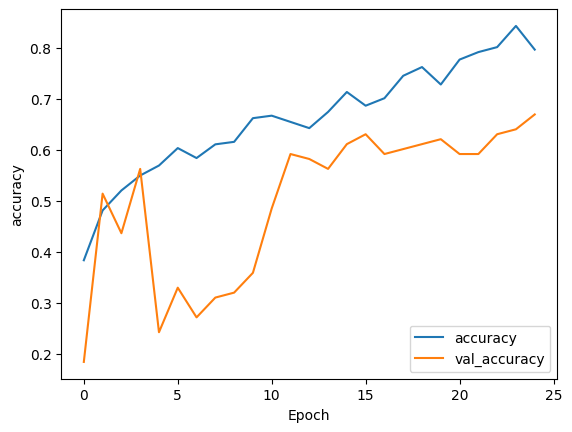

In [35]:
show_performance_curve(history, 'accuracy', 'accuracy')

In [48]:
#history.history['val_accuracy'][25]
history.history['accuracy'][25]

0.8581907153129578

[0.3790322542190552, 0.5029585957527161, 0.5403226017951965, 0.6710526347160339, 0.7414634227752686, 0.8341231942176819, 0.7753304243087769, 0.7644787430763245, 0.7662835121154785, 0.855967104434967, 0.8677042722702026, 0.8320610523223877, 0.8208954930305481, 0.8587360382080078, 0.9118773937225342, 0.8953068852424622, 0.8522336483001709, 0.899328887462616, 0.8827361464500427, 0.8621794581413269, 0.9271523356437683, 0.9218240976333618, 0.8849557638168335, 0.9144542813301086, 0.8855421543121338]
[0.18446601927280426, 0.5196078419685364, 0.4938271641731262, 0.6129032373428345, 0.1875, 0.125, 0.13636364042758942, 0.260869562625885, 0.3181818127632141, 0.3333333432674408, 0.5714285969734192, 0.6875, 0.8333333134651184, 0.692307710647583, 0.8181818127632141, 0.8529411554336548, 0.8285714387893677, 0.7291666865348816, 0.7777777910232544, 0.8113207817077637, 0.807692289352417, 0.7543859481811523, 0.8070175647735596, 0.761904776096344, 0.75]


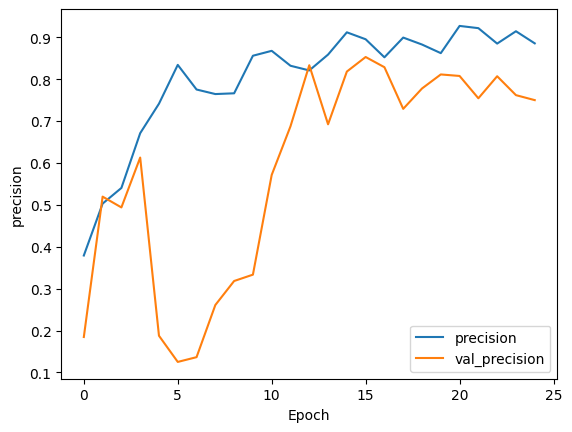

In [36]:
show_performance_curve(history, 'precision', 'precision')

4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 402ms/step


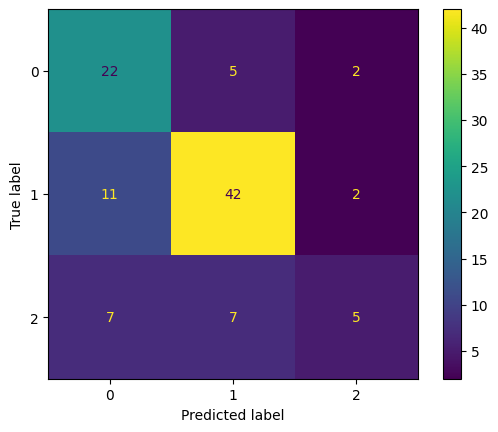

In [37]:
test_predictions = model.predict(X_test)

test_predicted_labels = np.argmax(test_predictions, axis=1)

test_true_labels = np.argmax(y_test, axis=1)

cm = confusion_matrix(test_true_labels, test_predicted_labels)

cmd = ConfusionMatrixDisplay(confusion_matrix=cm)

cmd.plot(include_values=True, cmap='viridis', ax=None, xticks_rotation='horizontal')
plt.show()

In [65]:
# concatencacion por canal (se pasan las dos imágenes a la vez pero por separado - 2 imágenes - 2 canales)

input_shape = X_channels_train.shape[1:]  # (D, H, W, 2)

model2 = Sequential([
    Conv3D(8, kernel_size=3, activation='relu', padding='same', input_shape=input_shape),
    MaxPooling3D(pool_size=2, strides=2), # Las imágenes tiene profundidad de 1
    BatchNormalization(),

    Conv3D(16, kernel_size=3, activation='relu', padding='same'),
    MaxPooling3D(pool_size=2),
    BatchNormalization(),

    Conv3D(32, kernel_size=3, activation='relu', padding='same'),
    MaxPooling3D(pool_size=2),
    BatchNormalization(),

    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.7),
    Dense(3, activation='softmax')  # ahora tiene 3 clases
])

model2.compile(optimizer=Adam(1e-4), loss='categorical_crossentropy', metrics=['accuracy',
               	Precision(name='precision'),
               	Recall(name='recall')])
model2.summary()

c:\Users\Usuario\Documents\TFM - Chey\tfm\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv3d_30 (Conv3D)              │ (None, 129, 99, 105,   │           440 │
│                                 │ 8)                     │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d_30 (MaxPooling3D) │ (None, 64, 49, 52, 8)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_30          │ (None, 64, 49, 52, 8)  │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3d_31 (Conv3D)              │ (None, 64, 49, 52, 16) │         3,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d_31 (MaxPooling3D) │ (None, 32, 24, 26, 16) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_31          │ (None, 32, 24, 26, 16) │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3d_32 (Conv3D)              │ (None, 32, 24, 26, 32) │        13,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d_32 (MaxPooling3D) │ (None, 16, 12, 13, 32) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_32          │ (None, 16, 12, 13, 32) │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 79872)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 64)             │     5,111,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,130,059 (19.57 MB)

 Trainable params: 5,129,947 (19.57 MB)

 Non-trainable params: 112 (448.00 B)

In [67]:
history2 = model2.fit(
    X_channels_train, y_channels_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(X_channels_test, y_channels_test),
    verbose=1
)

Epoch 1/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 36s 7s/step - accuracy: 0.3293 - loss: 2.5565 - precision: 0.3178 - recall: 0.2894 - val_accuracy: 0.4038 - val_loss: 23.8074 - val_precision: 0.4038 - val_recall: 0.4038
Epoch 2/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 35s 5s/step - accuracy: 0.5043 - loss: 3.1703 - precision: 0.5348 - recall: 0.4765 - val_accuracy: 0.1538 - val_loss: 15.7029 - val_precision: 0.1538 - val_recall: 0.1538
Epoch 3/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 18s 3s/step - accuracy: 0.4919 - loss: 2.1770 - precision: 0.5205 - recall: 0.3944 - val_accuracy: 0.2885 - val_loss: 5.0623 - val_precision: 0.2941 - val_recall: 0.2885
Epoch 4/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 15s 3s/step - accuracy: 0.5632 - loss: 1.4041 - precision: 0.6140 - recall: 0.4152 - val_accuracy: 0.6538 - val_loss: 1.3915 - val_precision: 0.6800 - val_recall: 0.6538
Epoch 5/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 19s 3s/step - accuracy: 0.5433 - loss: 1.3948 - precision: 0.5902 - recall: 0.3725 - val_accuracy: 0.5192 - val_loss: 1.3031 - val_precisi

In [70]:
# concatenación espacial (se unen las imágenes creando un hipocampo completo - única imagen - 1 canal)
input_shape = X_whole_train.shape[1:]  # (D, H, W, 1)

model3 = Sequential([
    Conv3D(8, kernel_size=3, activation='relu', padding='same', input_shape=input_shape),
    MaxPooling3D(pool_size=2, strides=2), # Las imágenes tiene profundidad de 1
    BatchNormalization(),

    Conv3D(16, kernel_size=3, activation='relu', padding='same'),
    MaxPooling3D(pool_size=2),
    BatchNormalization(),

    Conv3D(32, kernel_size=3, activation='relu', padding='same'),
    MaxPooling3D(pool_size=2),
    BatchNormalization(),

    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.7),
    Dense(3, activation='softmax')  # ahora tiene 3 clases
])

model3.compile(optimizer=Adam(1e-4), loss='categorical_crossentropy', metrics=['accuracy',
               	Precision(name='precision'),
               	Recall(name='recall')])
model3.summary()

c:\Users\Usuario\Documents\TFM - Chey\tfm\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv3d_36 (Conv3D)              │ (None, 129, 99, 210,   │           224 │
│                                 │ 8)                     │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d_36 (MaxPooling3D) │ (None, 64, 49, 105, 8) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_36          │ (None, 64, 49, 105, 8) │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3d_37 (Conv3D)              │ (None, 64, 49, 105,    │         3,472 │
│                                 │ 16)                    │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d_37 (MaxPooling3D) │ (None, 32, 24, 52, 16) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_37          │ (None, 32, 24, 52, 16) │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3d_38 (Conv3D)              │ (None, 32, 24, 52, 32) │        13,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d_38 (MaxPooling3D) │ (None, 16, 12, 26, 32) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_38          │ (None, 16, 12, 26, 32) │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 159744)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 64)             │    10,223,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,241,651 (39.07 MB)

 Trainable params: 10,241,539 (39.07 MB)

 Non-trainable params: 112 (448.00 B)

In [71]:
history3 = model3.fit(
    X_whole_train, y_whole_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(X_whole_test, y_whole_test),
    verbose=1
)

Epoch 1/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 134s 26s/step - accuracy: 0.3931 - loss: 3.8389 - precision: 0.3992 - recall: 0.3794 - val_accuracy: 0.4038 - val_loss: 27.1678 - val_precision: 0.4038 - val_recall: 0.4038
Epoch 2/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 255s 66s/step - accuracy: 0.4288 - loss: 2.6684 - precision: 0.4525 - recall: 0.3786 - val_accuracy: 0.3462 - val_loss: 13.8410 - val_precision: 0.3462 - val_recall: 0.3462
Epoch 3/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 338s 76s/step - accuracy: 0.5219 - loss: 1.7176 - precision: 0.5548 - recall: 0.3993 - val_accuracy: 0.1923 - val_loss: 8.8922 - val_precision: 0.1923 - val_recall: 0.1923
Epoch 4/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 289s 63s/step - accuracy: 0.5286 - loss: 1.8035 - precision: 0.6336 - recall: 0.3050 - val_accuracy: 0.4423 - val_loss: 3.0964 - val_precision: 0.4423 - val_recall: 0.4423
Epoch 5/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 363s 84s/step - accuracy: 0.5288 - loss: 1.8413 - precision: 0.7252 - recall: 0.3127 - val_accuracy: 0.5000 - val_loss: 2.3015 - v

In [38]:
# flipping right hippocmapus tu match left hipocmapus
# concatenación espacial (se unen las imágenes creando un hipocampo completo - única imagen - 1 canal)
input_shape = X_flipped_train.shape[1:]  # (D, H, W, 1)

model4 = Sequential([
    Conv3D(8, kernel_size=3, activation='relu', padding='same', input_shape=input_shape),
    MaxPooling3D(pool_size=2, strides=2), # Las imágenes tiene profundidad de 1
    BatchNormalization(),

    Conv3D(16, kernel_size=3, activation='relu', padding='same'),
    MaxPooling3D(pool_size=2),
    BatchNormalization(),

    Conv3D(32, kernel_size=3, activation='relu', padding='same'),
    MaxPooling3D(pool_size=2),
    BatchNormalization(),

    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.7),
    Dense(3, activation='softmax')  # ahora tiene 3 clases
])

model4.compile(optimizer=Adam(1e-4), loss='categorical_crossentropy', metrics=['accuracy',
               	Precision(name='precision'),
               	Recall(name='recall')])
model4.summary()

c:\Users\Usuario\Documents\TFM - Chey\tfm\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv3d_9 (Conv3D)               │ (None, 129, 99, 105,   │           224 │
│                                 │ 8)                     │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d_9 (MaxPooling3D)  │ (None, 64, 49, 52, 8)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 64, 49, 52, 8)  │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3d_10 (Conv3D)              │ (None, 64, 49, 52, 16) │         3,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d_10 (MaxPooling3D) │ (None, 32, 24, 26, 16) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 32, 24, 26, 16) │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3d_11 (Conv3D)              │ (None, 32, 24, 26, 32) │        13,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d_11 (MaxPooling3D) │ (None, 16, 12, 13, 32) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 16, 12, 13, 32) │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 79872)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │     5,111,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,129,843 (19.57 MB)

 Trainable params: 5,129,731 (19.57 MB)

 Non-trainable params: 112 (448.00 B)

In [39]:
history4 = model4.fit(
    X_flipped_train, y_flipped_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(X_flipped_test, y_flipped_test),
    verbose=1
)

Epoch 1/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 97s 5s/step - accuracy: 0.3490 - loss: 2.5288 - precision: 0.3431 - recall: 0.3047 - val_accuracy: 0.5340 - val_loss: 5.6393 - val_precision: 0.5340 - val_recall: 0.5340
Epoch 2/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 39s 4s/step - accuracy: 0.4537 - loss: 1.8308 - precision: 0.4449 - recall: 0.2954 - val_accuracy: 0.2816 - val_loss: 5.1025 - val_precision: 0.2816 - val_recall: 0.2816
Epoch 3/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 32s 4s/step - accuracy: 0.5265 - loss: 1.4731 - precision: 0.5298 - recall: 0.3004 - val_accuracy: 0.2816 - val_loss: 3.2420 - val_precision: 0.2843 - val_recall: 0.2816
Epoch 4/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 26s 3s/step - accuracy: 0.4862 - loss: 1.1645 - precision: 0.5686 - recall: 0.3030 - val_accuracy: 0.3689 - val_loss: 1.1162 - val_precision: 0.5556 - val_recall: 0.1942
Epoch 5/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 30s 4s/step - accuracy: 0.5760 - loss: 0.9563 - precision: 0.7191 - recall: 0.3593 - val_accuracy: 0.4369 - val_loss: 1.0702 - val_precision

[0.38386309146881104, 0.4816626012325287, 0.5207824110984802, 0.5501222610473633, 0.5696821808815002, 0.6039119958877563, 0.5843520760536194, 0.6112469434738159, 0.616136908531189, 0.6625916957855225, 0.6674816608428955, 0.6552567481994629, 0.6430317759513855, 0.6748166084289551, 0.713936448097229, 0.6870415806770325, 0.7017114758491516, 0.7457212805747986, 0.7628361582756042, 0.7286063432693481, 0.7775061130523682, 0.7921760678291321, 0.8019559979438782, 0.8435207605361938, 0.7970660328865051]
[0.18446601927280426, 0.5145630836486816, 0.43689319491386414, 0.5631067752838135, 0.24271844327449799, 0.3300970792770386, 0.27184465527534485, 0.3106796145439148, 0.3203883469104767, 0.35922330617904663, 0.48543688654899597, 0.5922330021858215, 0.582524299621582, 0.5631067752838135, 0.6116504669189453, 0.6310679316520691, 0.5922330021858215, 0.6019417643547058, 0.6116504669189453, 0.6213592290878296, 0.5922330021858215, 0.5922330021858215, 0.6310679316520691, 0.6407766938209534, 0.669902920722

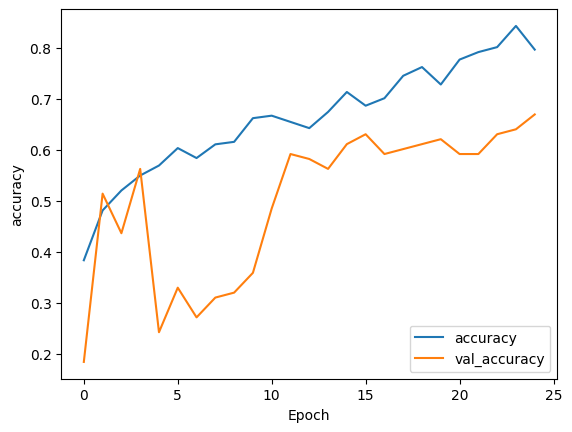

In [40]:
show_performance_curve(history, 'accuracy', 'accuracy')

[0.3790322542190552, 0.5029585957527161, 0.5403226017951965, 0.6710526347160339, 0.7414634227752686, 0.8341231942176819, 0.7753304243087769, 0.7644787430763245, 0.7662835121154785, 0.855967104434967, 0.8677042722702026, 0.8320610523223877, 0.8208954930305481, 0.8587360382080078, 0.9118773937225342, 0.8953068852424622, 0.8522336483001709, 0.899328887462616, 0.8827361464500427, 0.8621794581413269, 0.9271523356437683, 0.9218240976333618, 0.8849557638168335, 0.9144542813301086, 0.8855421543121338]
[0.18446601927280426, 0.5196078419685364, 0.4938271641731262, 0.6129032373428345, 0.1875, 0.125, 0.13636364042758942, 0.260869562625885, 0.3181818127632141, 0.3333333432674408, 0.5714285969734192, 0.6875, 0.8333333134651184, 0.692307710647583, 0.8181818127632141, 0.8529411554336548, 0.8285714387893677, 0.7291666865348816, 0.7777777910232544, 0.8113207817077637, 0.807692289352417, 0.7543859481811523, 0.8070175647735596, 0.761904776096344, 0.75]


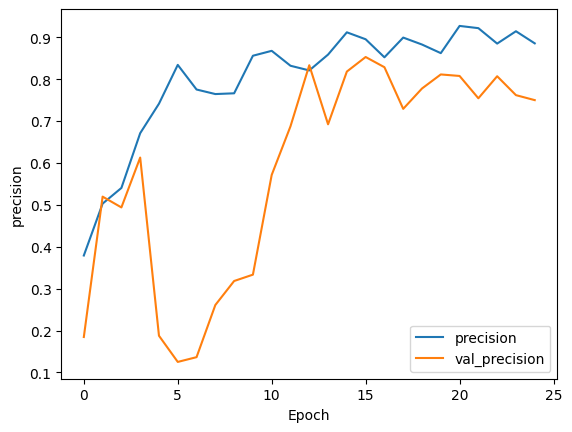

In [41]:
show_performance_curve(history, 'precision', 'precision')

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 420ms/step


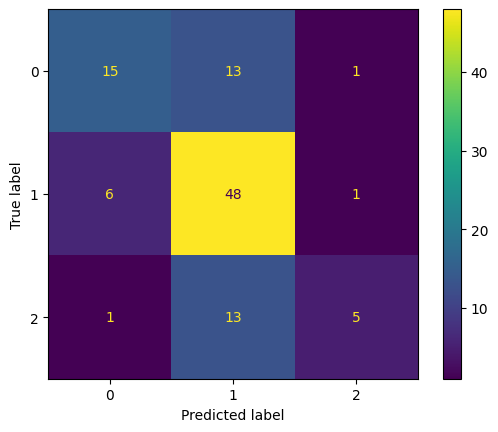

In [42]:
test_predictions = model4.predict(X_flipped_test)

test_predicted_labels = np.argmax(test_predictions, axis=1)

test_true_labels = np.argmax(y_flipped_test, axis=1)

cm = confusion_matrix(test_true_labels, test_predicted_labels)

cmd = ConfusionMatrixDisplay(confusion_matrix=cm)

cmd.plot(include_values=True, cmap='viridis', ax=None, xticks_rotation='horizontal')
plt.show()